In [5]:
"""
reference:
    https://medium.com/@bmiroglio/introducing-the-pymatch-package-6a8c020e2009 
"""

'\nreference:\n    https://medium.com/@bmiroglio/introducing-the-pymatch-package-6a8c020e2009 \n'

In [7]:
#!pip install pymatch

  Running setup.py bdist_wheel for pymatch ... - \ done
  Stored in directory: /Users/riow/Library/Caches/pip/wheels/c4/33/4a/621c2887678379d452860bacf4434ace1ca5cc668ebf93bb11
Successfully built pymatch
You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [12]:
#!pip install --upgrade scipy

Requirement already up-to-date: scipy in /anaconda/lib/python3.6/site-packages (1.2.1)
You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
#!conda update statsmodels --yes

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /anaconda:

The following NEW packages will be INSTALLED:

    blas:        1.0-mkl                      
    certifi:     2018.11.29-py36_0            
    pysocks:     1.6.8-py36_0                 
    urllib3:     1.24.1-py36_0                

The following packages will be UPDATED:

    chardet:     2.3.0-py36_0                  --> 3.0.4-py36_1        
    conda:       4.3.29-py36_0     conda-forge --> 4.6.7-py36_0        
    conda-env:   2.6.0-0           conda-forge --> 2.6.0-1             
    idna:        2.2-py36_0                    --> 2.8-py36_0          
    pycosat:     0.6.1-py36_1                  --> 0.6.3-py36h1de35cc_0
    requests:    2.12.4-py36_0                 --> 2.21.0-py36_0       
    setuptools:  27.2.0-py36_0                 --> 40.8.0-py36_0       
    statsmodels: 0.6.1-np111py36_1             --> 0.9.0-py36h1d22016_0

blas-1.0-mkl.t

In [4]:
from pymatch.Matcher import Matcher

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

%matplotlib inline

In [7]:
path = "./data/loan.csv"
fields = ["loan_amnt", "funded_amnt", "funded_amnt_inv", "term", "int_rate", "installment", 
          "grade", "sub_grade", "loan_status"]
data = pd.read_csv(path)[fields]

In [10]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,loan_status
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,Fully Paid
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Charged Off
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,Fully Paid
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,Fully Paid
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,Current


In [11]:
test = data[data.loan_status == "Default"]
control = data[data.loan_status == "Fully Paid"]
test['loan_status'] = 1
control['loan_status'] = 0

# Fit Propensity Score Model(s)

In [13]:
m = Matcher(test, control, yvar="loan_status", exclude=[])

Formula:
loan_status ~ loan_amnt+funded_amnt+funded_amnt_inv+term+int_rate+installment+grade+sub_grade
n majority: 207723
n minority: 1219


In [14]:
np.random.seed(20170925)
m.fit_scores(balance=True, nmodels=100)

Fitting Models on Balanced Samples: 100\100
Average Accuracy: 70.08%


In [16]:
m.predict_scores()

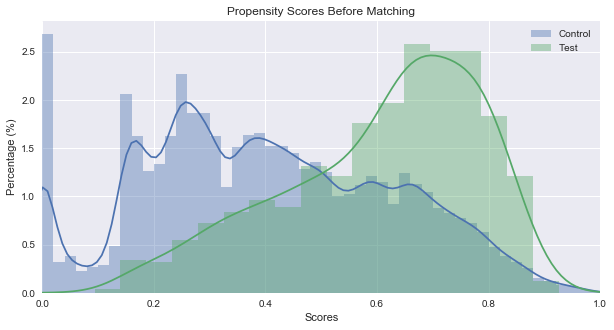

In [17]:
m.plot_scores()

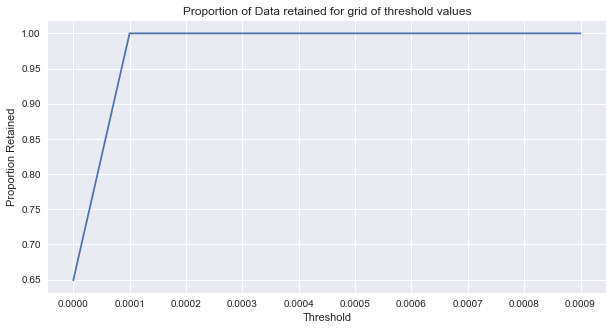

In [18]:
m.tune_threshold(method='random')

# Match Data

In [19]:
m.match(method="min", nmatches=1, threshold=0.0001)
m.record_frequency()

,freq,n_records
0,1,2265
1,2,69
2,3,9
3,4,2


In [21]:
m.assign_weight_vector()

In [22]:
m.matched_data.sort_values("match_id").head(6)

,record_id,weight,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,loan_status,scores,match_id
0,0,1.0,18000.0,18000.0,17975.000000,60 months,17.27,449.97,D,D3,1,0.652618,0
1550,117862,1.0,25000.0,25000.0,24975.000000,36 months,20.99,941.75,E,E3,0,0.652630,0
1245,11338,1.0,7000.0,7000.0,7000.000000,36 months,6.99,216.11,A,A3,0,0.189417,1
1,1,1.0,21250.0,21250.0,21003.604048,60 months,14.27,497.43,C,C2,1,0.189407,1
2,2,1.0,5600.0,5600.0,5600.000000,60 months,15.99,136.16,D,D2,1,0.782090,2
2084,178731,1.0,7875.0,7875.0,7875.000000,36 months,24.50,311.03,F,F3,0,0.782071,2


# Assess Matches

### Categorical

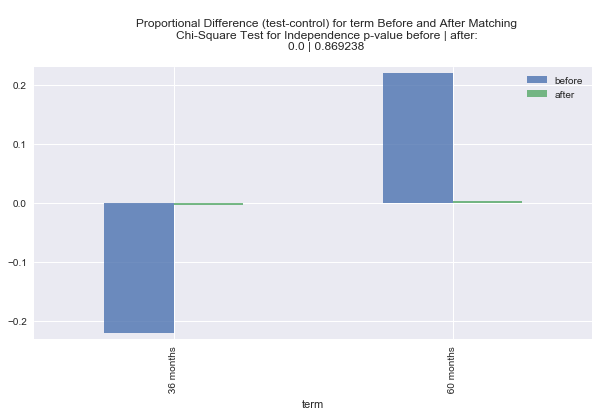

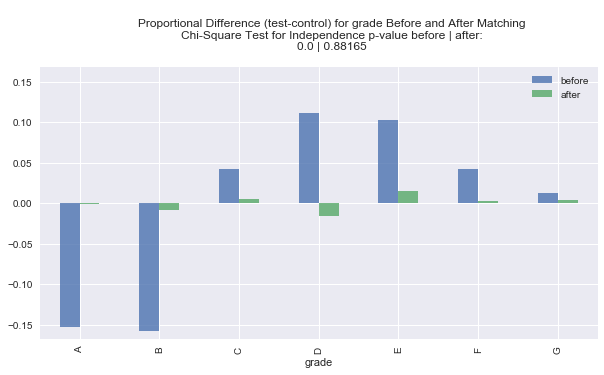

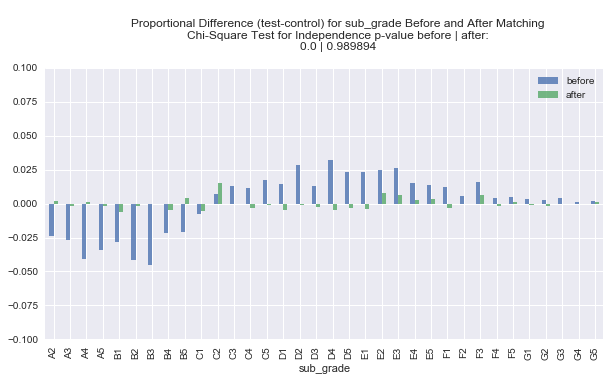

In [23]:
categorical_results = m.compare_categorical(return_table=True)

### Continuous

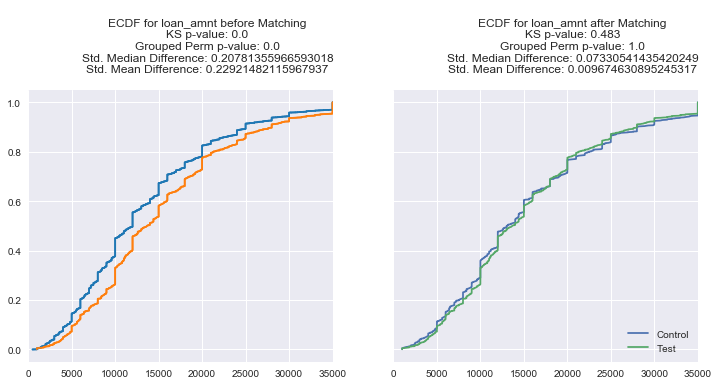

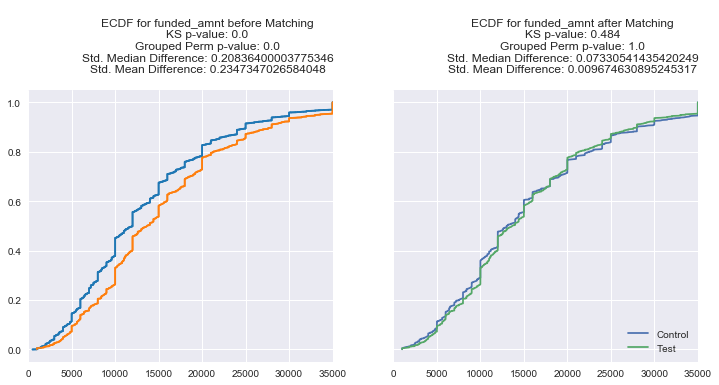

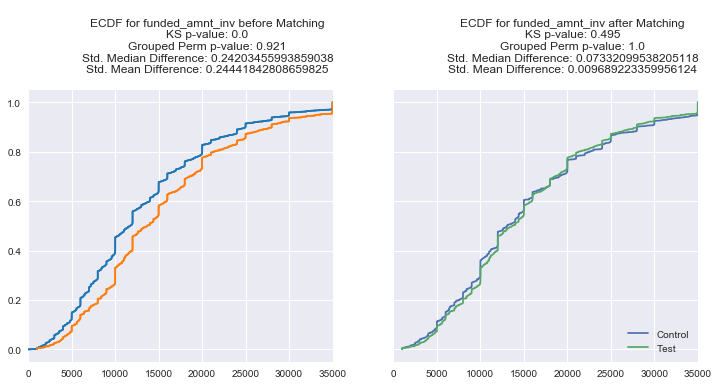

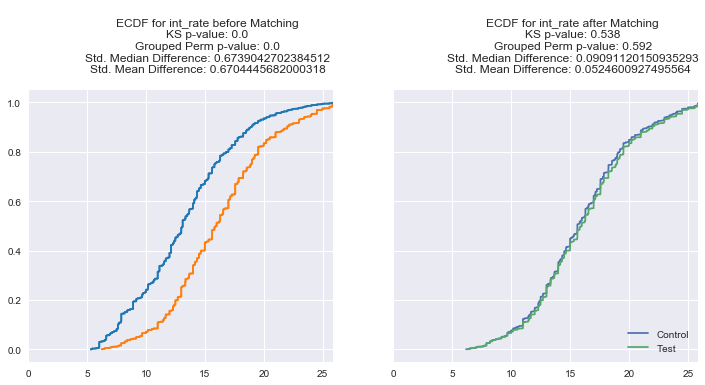

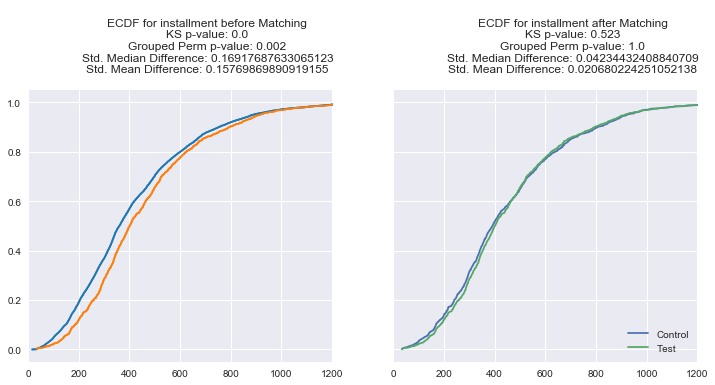

In [25]:
cc = m.compare_continuous(return_table=True)